Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import ast

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

Load dataset

In [ ]:
movies = pd.read_csv("/content/tmdb_5000_movies.csv")
credits = pd.read_csv("/content/tmdb_5000_credits.csv")

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.shape

(4803, 20)

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.shape

(4803, 4)

In [ ]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.shape

(4809, 23)

In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

<Axes: >

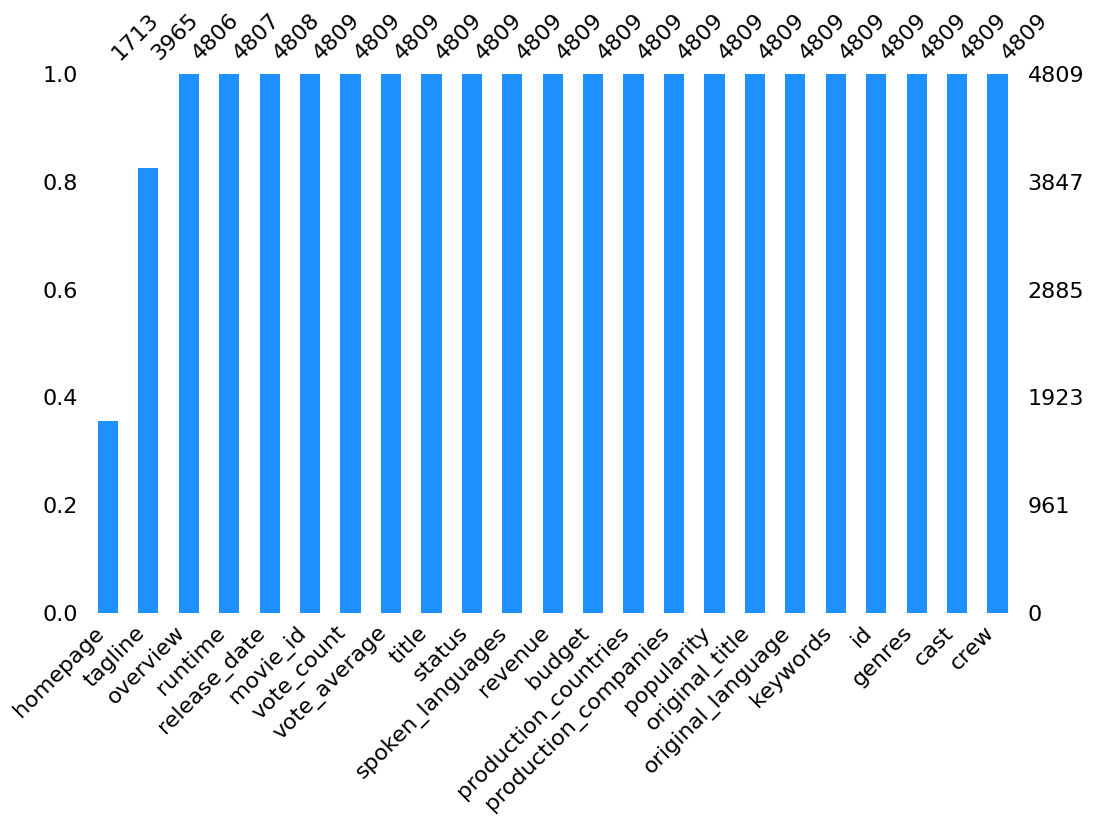

In [ ]:
import missingno
missingno.bar(movies, color="dodgerblue", sort="ascending", figsize=(12,7))

Now finally our required columns are

In [ ]:
df = movies[['genres','keywords','overview','title','movie_id','cast','crew']]

In [ ]:
df.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...",John Carter,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
df.shape

(4809, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4809 non-null   object
 1   keywords  4809 non-null   object
 2   overview  4806 non-null   object
 3   title     4809 non-null   object
 4   movie_id  4809 non-null   int64 
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


Data Preprocessing

In [ ]:
df.isnull().sum()

genres      0
keywords    0
overview    3
title       0
movie_id    0
cast        0
crew        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
def convert(selection):
    l=[]
    for i in ast.literal_eval(selection):
        l.append(i['name'])
    return l

In [ ]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
df['genres']=df['genres'].apply(convert)
df['genres'][0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [ ]:
df['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [ ]:
df['keywords']=df['keywords'].apply(convert)
df['keywords'][0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [ ]:
def convert_2(selection):
    l=[]
    count=0
    for i in ast.literal_eval(selection):
        if (count!=3):
            l.append(i['name'])
            count=count+1
        else:
            break
    return l

In [ ]:
df['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [ ]:
df['cast']=df['cast'].apply(convert_2)
df['cast'][0]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [ ]:
def convert_3(selection):
    l=[]
    for i in ast.literal_eval(selection):

        if (i['job']=="Director") :
            l.append(i['name'])
            break

    return l

In [ ]:
df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [ ]:
df['crew']=df['crew'].apply(convert_3)
df['crew'][0]

['James Cameron']

In [ ]:
df.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...",Avatar,19995,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,285,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,Spectre,206647,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,The Dark Knight Rises,49026,"[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...",John Carter,49529,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [ ]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
df['overview'] = df['overview'].apply(lambda x:x.split())

In [ ]:
df['overview'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

We need to remove the spaces between the words from genres,keywords,cast and crew columns,to improve our tags

In [ ]:
df['genres'] = df['genres'].apply(lambda x:[i.replace(' ','') for i in x])
df['keywords'] = df['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
df['cast'] = df['cast'].apply(lambda x:[i.replace(' ','') for i in x])
df['crew'] = df['crew'].apply(lambda x:[i.replace(' ','') for i in x])

In [ ]:
df.head()

,genres,keywords,overview,title,movie_id,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...",Avatar,19995,"[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...",Pirates of the Caribbean: At World's End,285,"[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...",Spectre,206647,"[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...",The Dark Knight Rises,49026,"[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,"[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...",John Carter,49529,"[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
df['tags']=df['genres']+df['keywords']+df['overview']+df['cast']+df['crew']

In [ ]:
df.drop(['genres','keywords','overview','cast','crew'],axis=1,inplace=True)

In [ ]:
df.head()

,title,movie_id,tags
0,Avatar,19995,"[Action, Adventure, Fantasy, ScienceFiction, c..."
1,Pirates of the Caribbean: At World's End,285,"[Adventure, Fantasy, Action, ocean, drugabuse,..."
2,Spectre,206647,"[Action, Adventure, Crime, spy, basedonnovel, ..."
3,The Dark Knight Rises,49026,"[Action, Crime, Drama, Thriller, dccomics, cri..."
4,John Carter,49529,"[Action, Adventure, ScienceFiction, basedonnov..."


In [ ]:
df['tags']=df['tags'].apply(lambda x:' '.join(x))

In [ ]:
df.head()

,title,movie_id,tags
0,Avatar,19995,Action Adventure Fantasy ScienceFiction cultur...
1,Pirates of the Caribbean: At World's End,285,Adventure Fantasy Action ocean drugabuse exoti...
2,Spectre,206647,Action Adventure Crime spy basedonnovel secret...
3,The Dark Knight Rises,49026,Action Crime Drama Thriller dccomics crimefigh...
4,John Carter,49529,Action Adventure ScienceFiction basedonnovel m...


In [ ]:
df['tags']=df['tags'].apply(lambda x:x.lower())

In [ ]:
df['tags'][0]

'action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. samworthington zoesaldana sigourneyweaver jamescameron'

In [ ]:
ps=PorterStemmer()

In [ ]:
def convert_4(tag):
    l=[]
    for i in tag.split():
        l.append(ps.stem(i))
    string=' '.join(l)
    return string

In [ ]:
df['tags']=df['tags'].apply(convert_4)
df['tags'][0]

'action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. samworthington zoesaldana sigourneyweav jamescameron'

To bridge the gap between human language and computational algorithms in NLP, text is converted into numerical representations for effective processing by machines.

In [ ]:
cv = CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
cvec = cv.fit_transform(df['tags']).toarray()

In [ ]:
cvec.shape

(4806, 5000)

In [ ]:
feature_names=cv.get_feature_names_out()
feature_names[:100]

array(['000', '007', '10', '100', '11', '12', '13', '14', '15', '16',
       '17', '17th', '18', '18th', '18thcenturi', '19', '1910', '1920',
       '1930', '1940', '1944', '1950', '1950s', '1960', '1960s', '1970',
       '1970s', '1971', '1974', '1976', '1980', '1985', '1990', '1999',
       '19th', '19thcenturi', '20', '200', '2003', '2009', '20th', '21st',
       '23', '24', '25', '30', '300', '3d', '40', '50', '500', '60', '70',
       '80', 'aaron', 'aaroneckhart', 'abandon', 'abduct',
       'abigailbreslin', 'abil', 'abl', 'aboard', 'abov', 'abus',
       'academ', 'academi', 'accept', 'access', 'accid', 'accident',
       'acclaim', 'accompani', 'accomplish', 'account', 'accus', 'ace',
       'achiev', 'acquaint', 'act', 'action', 'actionhero', 'activ',
       'activist', 'activities', 'actor', 'actress', 'actual', 'ad',
       'adam', 'adamsandl', 'adamshankman', 'adapt', 'add', 'addict',
       'adjust', 'admir', 'admit', 'adolesc', 'adopt', 'ador'],
      dtype=object)

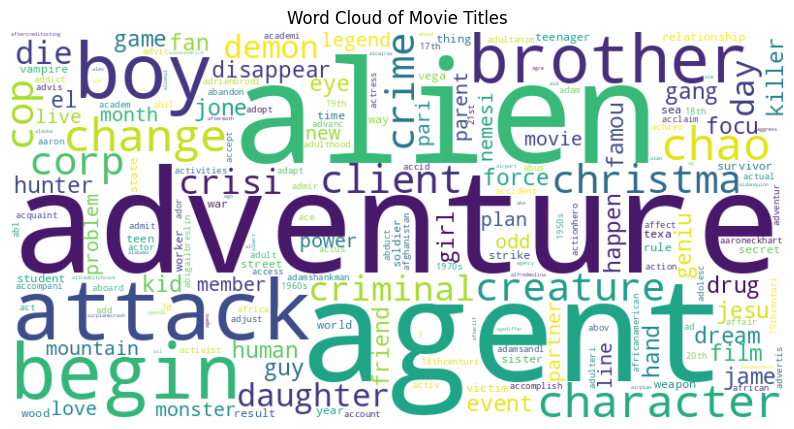

In [ ]:
movie_titles = ' '.join(feature_names)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(movie_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Titles')
plt.axis('off')
plt.show()

Cosine Similarity

In NLP, cosine similarity quantifies the similarity between two text documents by measuring the cosine of the angle between their vector representations in a high-dimensional space, such as TF-IDF or word embeddings.

In [ ]:
cosine_similarity=cosine_similarity(cvec)

In [ ]:
cosine_similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [ ]:
cosine_similarity.shape

(4806, 4806)

Evaluation

The function to recommend similar movies based on input movie name, utilizing techniques like collaborative filtering or content-based filtering for similarity analysis.

In [ ]:
def recommend(name):
    movie_index=df[df['title'] == name].index[0]
    cosine_distance=cosine_similarity[movie_index]
    movie_list = sorted(list(enumerate(cosine_distance)),reverse=True,key=lambda x:x[1])[1:6]

    for i in movie_list:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Batman')

Batman
Batman & Robin
Batman Begins
Batman Returns
The R.M.


Using pickle for deploying the model

In [ ]:
import pickle
pickle.dump(df,open('Movie Recommendation System using NLTK.pkl','wb'))
pickle.dump(df.to_dict(),open('Movie Recommendation System dict.pkl','wb'))
pickle.dump(cosine_similarity,open('Movie Recommendation System similarity.pkl','wb'))